# RAKAMIN ACADEMY

## Nama : Elfajar Bintang Samudera
## Task : End to End Solution (WEEK 04)

### Tugas yang perlu diselesaikan

1. File dataset yang disediakan terdiri dari satu file data (format csv) dan satu data dictionary (format xlsx) yang berisikan informasi mengenai masing-masing kolom yang ada pada file data. Silahkan pelajari informasi mengenai data tersebut untuk mengetahui langkah apa yang perlu dilakukan untuk mempersiapkan data
2. Siapkan tools yang akan kamu gunakan untuk membantu pengerjaan soal seperti
yang telah dijelaskan di prerequisite, lalu import data untuk mempersiapkan
pengerjaan.
3. Terdapat dua skenario pengumpulan tugas berdasarkan bahasa pemrograman yang kamu gunakan untuk mengerjakan final project ini.

  a. Apabila kamu menggunakan R untuk mengerjakan tugas ini, kamu perlu mengumpulkan:
    - File Code dengan format .R
    - File R Markdown dengan format .Rmd
    - File infografis sebagai media presentasi end-to-end solution yang telah kamu buat

  b. Apabila kamu menggunakan Python untuk mengerjakan tugas ini, kamu perlu mengumpulkan:
    - File Code dengan format .py
    - File Python Notebook dengan format .ipynb
    - File infografis sebagai media presentasi end-to-end solution yang telah kamu buat
4. Kerjakan tugas dan siapkan seluruh file yang perlu kamu kumpulkan dengan mengacu kepada No. 3
5. Gabung ketiga file yang telah kamu selesaikan dalam satu folder ZIP yang diberi judul "[Nama Lengkap]_VIX_ID/X Partners"
6. Submit tugasmu hanya dalam bentuk folder ZIP sesuai ketentuan di No. 5



### BUSINESS UNDERSTANDING

#### 1.1 Objective
Melakukan prediksi nilai Credit Risk berdasarkan *dataset* yang diberikan.

#### 1.2 Description

Dataset yang diberikan memuat data mengenai data *loan* dengan range tahun 2007-2014.

Berdasarkan *dataset*, terdapat 35 total tipe variabel numerik, 22 variabel tipe kategorikal, dan 17 tipe variabel lainnya. Variabel tipe kategori meliputi sebagai berikut:
 - term
 - grade
 - sub_grade
 - emp_title
 - emp_length
 - home_ownership
 - verification_status
 - issue_d
 - loan_status
 - pymnt_plan
 - url
 - desc
 - purpose
 - title
 - zip_code
 - addr_state
 - earliest_cr_line

Solusi yang ditawarkan: **Penulis akan membuat model *machine learning* yang nantinya akan mengidentifikasi status pinjaman berstatus buruk ataupun sebaliknya. Untuk modelnya sendiri, penulis akan menggunakan algoritma *non-parametical*, karena memberikan gambaran model yang terkesan simpel, dan juga mudah untuk dimaparkan kepada orang awam.**

**Penulis memutuskan untuk menggunakan bahasa pemrograman **"Python"**, dengan mempertimbangkan penulisan syntax yang lebih familiar, pemahaman terhadap konsep **Python** yang lebih mendalam dibanding **R**, serta memiliki *learning curve* yang bersifat linear.**

### DATA STORYTELLING

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv', low_memory = False)

In [3]:
!pip install https://github.com/ydataai/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/ydataai/pandas-profiling/archive/master.zip


In [4]:
from pandas_profiling import ProfileReport

In [5]:
profile = ProfileReport(df, title="Loan Data", minimal = True, html={'style':{'full_width':True}}, sort=None)

In [6]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### EXPLORATORY DATA ANALYSIS

In [7]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.tail()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN
466284,466284,9199665,11061576,10000,10000,9975.0,36 months,19.20,367.58,D,...,NaN,NaN,NaN,NaN,NaN,NaN,16000.0,NaN,NaN,NaN


In [9]:
df.shape

(466285, 75)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Berdasarkan hasil df.info(), sangat banyak kolom yang tidak memiliki nilai sama sekali, terutama beberapa kolom terakhir.

In [11]:
df.nunique()

Unnamed: 0          466285
id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 75, dtype: int64

In [12]:
df.dtypes

Unnamed: 0            int64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [13]:
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,...,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,...,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,...,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,...,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,466284.000000,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,...,NaN,NaN,NaN,NaN,NaN,NaN,9.999999e+06,NaN,NaN,NaN


In [14]:
null_values = df.isnull().mean() # Mencari data kolom yang tidak memuat nilai sama sekali

In [15]:
null_values[null_values==1].index # Print list kolom sehingga mempermudah penulis melihat kolom yang tidak memiliki nilai

Index(['annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'],
      dtype='object')

In [16]:
dropped_df = ['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

dataset = df.drop(columns=dropped_df, axis = 1) # Membuat dataframe baru dengan kondisi sudah melakukan drop kolom yang tidak memiliki nilai

In [17]:
dataset.loan_status.value_counts() # Kolom loan_status merupakan kolom yang menjadi target

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Dikarenakan penulis akan memprediksi apakah status pinjaman jatuhnya buruk/beresiko, maka kita akan membuat klasifikasi status pinjaman dengan catatan:

 - Good Loans = Status -> "Fully Paid"
 - Bad Loans = Status -> "Charged Off", "Late (Jatuh Tempo)."

 Namun ada suatu kondisi seperti "Current", "In Grace Period" yang tidak merujuk kepada 2 catatan diatas. Sehingga untuk kasus seperti ini, penulis menyatakan sebagai status *Loan* yang tidak jelas, dikarenakan kedepannya statusnya bisa Good/Bad Loans. 

In [18]:
good = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'] # Status pinjaman baik
undefined =['Current', 'In Grace Period'] # Status pinjaman tidak jelas

# Penulis melakukan drop terhadap status loan yang dinilai "Undefined" atau tidak jelas
data = dataset[dataset.loan_status.isin(undefined) == False]

data['loan_ending'] = np.where(data['loan_status'].isin(good), 'good', 'bad')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


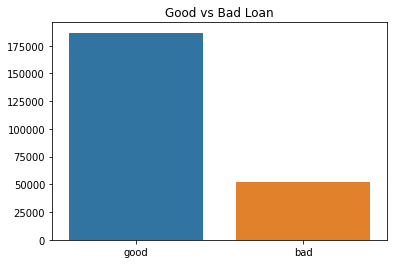

In [19]:
plt.title('Good vs Bad Loan')
sns.barplot(x=data.loan_ending.value_counts().index,y=data.loan_ending.value_counts().values)

In [20]:
# Penulis ingin melakukan pengecekan terhadap kolom dataframe
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim

Dengan melihat bantuan mengenai penjelasan kolom setiap data dari: https://docs.google.com/spreadsheets/d/1iT1JNOBwU4l616_rnJpo0iny7blZvNBs/edit#gid=1666154857 , Penulis menarik 4 kesimpulan yang penting

1. Kolom yang menjelaskan seputar identitas sang peminjam: 'member_id', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'zip_code', 'addr_state', 'dti'

2. Kolom yang menjelaskan seputar sifat dasar dari peminjaman: 'id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'application_type'

3. Kolom yang menjelaskan data personal sang peminjam: 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'mths_since_last_major_derog', 'acc_now_delinq'

4. Kolom yang menjelaskan status dari sebuah pinjaman: 'issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'

In [21]:
column_leak = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                   'last_pymnt_d', 'next_pymnt_d', 'last_pymnt_amnt']

In [22]:
data.drop(columns=column_leak, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [23]:
data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,238913.000000,238913.000000,238913.000000
mean,13486.214647,13440.797173,13312.662461
std,8066.725464,8042.190169,8080.099456
min,500.000000,500.000000,0.000000
25%,7200.000000,7200.000000,7125.000000
50%,12000.000000,12000.000000,11914.311470
75%,18000.000000,18000.000000,18000.000000
max,35000.000000,35000.000000,35000.000000


In [24]:
column_drop = ['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc']
dropped_data = data[column_drop]
data.drop(columns=column_drop, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    238913 non-null  int64  
 1   term                         238913 non-null  object 
 2   int_rate                     238913 non-null  float64
 3   installment                  238913 non-null  float64
 4   grade                        238913 non-null  object 
 5   sub_grade                    238913 non-null  object 
 6   emp_title                    225435 non-null  object 
 7   emp_length                   229688 non-null  object 
 8   home_ownership               238913 non-null  object 
 9   annual_inc                   238909 non-null  float64
 10  verification_status          238913 non-null  object 
 11  purpose                      238913 non-null  object 
 12  title                        238898 non-null  object 
 13 

Kedepannya, dataframe "data" yang akan digunakan untuk dilakukan proses *splitting dataset*, visualisasi data, dan pembentukan model *machine learning*.

### DATA VISUALIZATION

#### Visualisasi data dengan beragam kondisi data yang dinilai unik, serta penting.

In [26]:
# Kolom yang menjelaskan data personal sang peminjam (Kesimpulan ke-3)
personal_record = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
# Ke-3 kolom diatas memiliki banyak null-values
data[personal_record]

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
466276,3.0,NaN,4.0
466277,14.0,NaN,14.0
466278,29.0,NaN,32.0
466281,NaN,116.0,NaN


In [27]:
# Penulis melakukan asumsi untuk kolom 'mths_since_last_major_derog dengan fungsi np.where 
# Dimana nilai 0 = tidak, 1 = iya
data['major_derogatory'] = np.where(data['mths_since_last_major_derog'].isna(), 0, 1)

# Untuk 2 kolom sisanya, penulis memutuskan untuk melakukan drop kolom 
# karena dinilai sudah dijelaskan pada kolom 'delinq_2yrs' dan kolom ' acc_now_delinq'
drop_col = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']
dropped_data = pd.concat([dropped_data, data[drop_col]], axis = 1)

data.drop(columns=drop_col, axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [28]:
columns = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']
print(pd.pivot_table(data, index = 'loan_ending', values = columns))
print(pd.pivot_table(data, index = 'loan_ending', values = columns, aggfunc = np.max))

             tot_coll_amt    tot_cur_bal  total_rev_hi_lim
loan_ending                                               
bad            141.355723  116108.175291      26256.733754
good           219.721618  143006.253262      29996.098672
             tot_coll_amt  tot_cur_bal  total_rev_hi_lim
loan_ending                                             
bad               95806.0    3437283.0         1998700.0
good            9152545.0    8000078.0         2013133.0


In [29]:
# Melakukan deskripsi statistik terhadap variabel 'columns' yang memuat 3 kolom data
data[columns].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.722900e+05,1.722900e+05,1.722900e+05
mean,2.009637e+02,1.365678e+05,2.910103e+04
std,2.211009e+04,1.501802e+05,2.854495e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.795400e+04,1.320000e+04
50%,0.000000e+00,7.923900e+04,2.200000e+04
75%,0.000000e+00,2.064025e+05,3.620000e+04
max,9.152545e+06,8.000078e+06,2.013133e+06


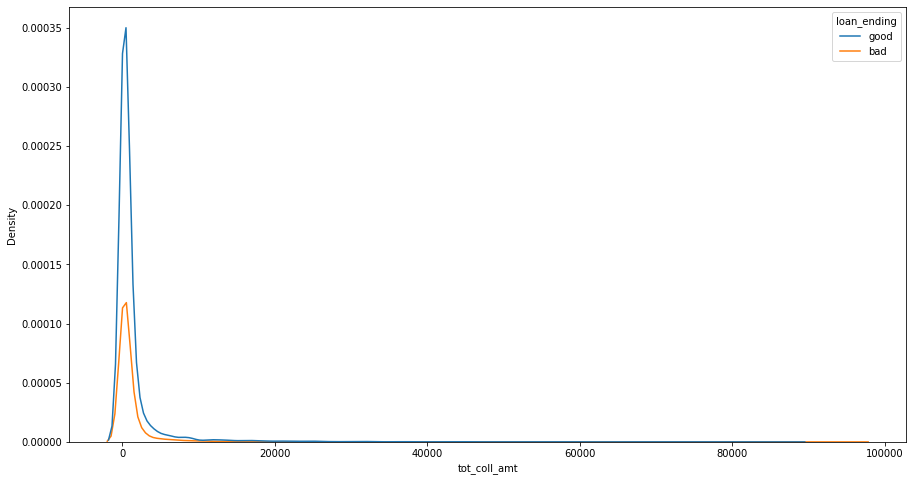

In [30]:
plt.figure(figsize=(15,8))
sns.kdeplot(data = data[(data['tot_coll_amt'] < 100000) & (data['tot_coll_amt'] > 0)], x='tot_coll_amt', hue='loan_ending')

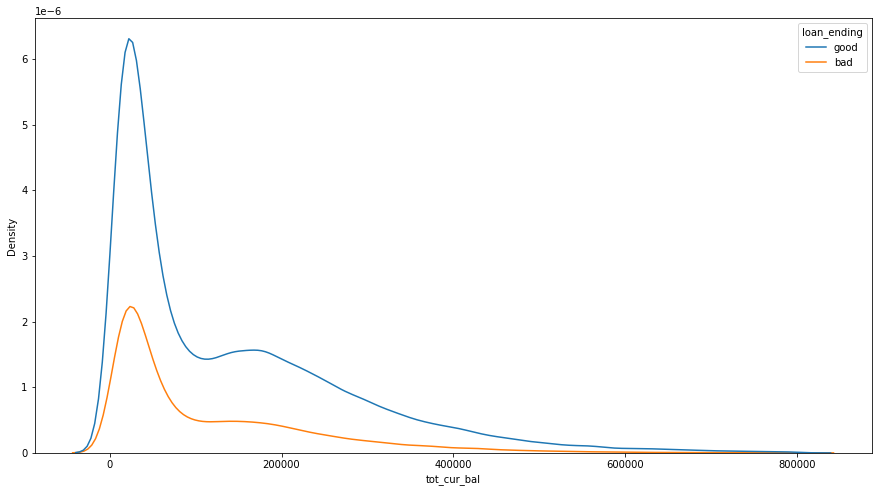

In [31]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data[data['tot_cur_bal'] < 800000], x='tot_cur_bal', hue='loan_ending')

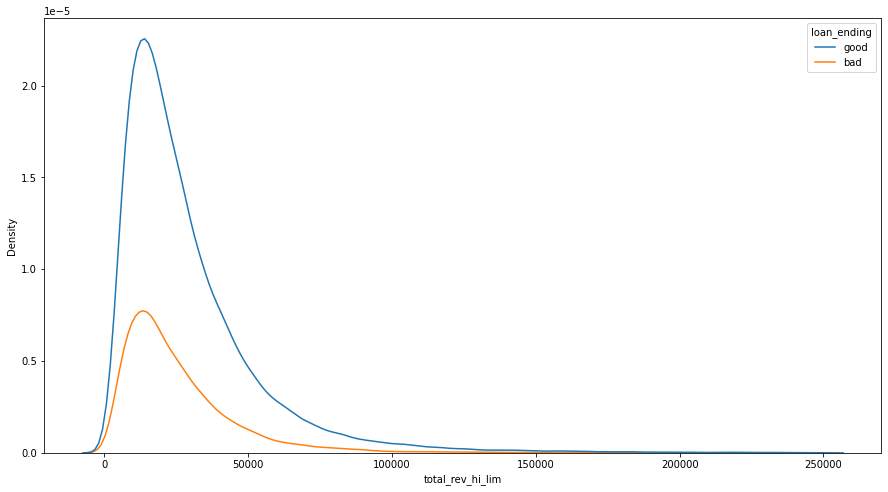

In [32]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data[data['total_rev_hi_lim'] < 250000], x='total_rev_hi_lim', hue='loan_ending')

Kesimpulan mengenai kolom 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' ialah:

1. Kisaran 75% dari kolom 'tot_coll_amt' bernilai = 0
2. Tidak terdapat pemisah yang jelas antara status Good/Bad Loan terhadap nilai kolom diatas.

In [33]:
# Visualisasi data dengan kolom yang memiliki nilai unik dibawah 10
data.nunique()[data.nunique() < 10].sort_values()

policy_code                   1
application_type              1
term                          2
initial_list_status           2
loan_ending                   2
major_derogatory              2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    7
dtype: int64

Dikarenakan kolom 'policy_code' dan 'application_type' hanya memiliki 1 nilai unik saja, penulis memutuskan untuk melakukan drop terhadap ke-2 kolom tersebut.

In [34]:
data.drop(['policy_code','application_type'], inplace=True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
# Visualisasi data kategori & numerik
num = data.select_dtypes(exclude= 'object')
num.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'major_derogatory'],
      dtype='object')

Penulis berhasil mendapatkan kolom data yang bertipe numerik

In [36]:
categorical = data.select_dtypes(include= 'object')
categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'loan_ending'],
      dtype='object')

Penulis berhasil mendapatkan kolom data yang bertipe kategorikal

Penulis menyadari bahwa pada data kategori, terdapat kolom data yang memiliki nilai yang berbeda, seperti 'emp_length', 'earliest_cr_line', dan 'last_credit_pull_d'.

In [37]:
columns = ['emp_length', 'earliest_cr_line', 'last_credit_pull_d']
categorical[columns].head()

,emp_length,earliest_cr_line,last_credit_pull_d
0,10+ years,Jan-85,Jan-16
1,< 1 year,Apr-99,Sep-13
2,10+ years,Nov-01,Jan-16
3,10+ years,Feb-96,Jan-15
5,3 years,Nov-04,Sep-15


In [38]:
data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

In [39]:
emp_map = {
    '< 1 year' : '0',
    '1 year' : '1',
    '2 years' : '2',
    '3 years' : '3',
    '4 years' : '4',
    '5 years' : '5',
    '6 years' : '6',
    '7 years' : '7',
    '8 years' : '8',
    '9 years' : '9',
    '10+ years' : '10'
}
data['emp_length'] = data['emp_length'].map(emp_map).fillna('0').astype(int)
data['emp_length'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([10,  0,  3,  9,  4,  5,  1,  6,  2,  7,  8])

In [40]:
data['earliest_cr_yr'] = pd.to_datetime(data['earliest_cr_line'], format = "%b-%y").dt.year
data['yr_since_last_inq'] = 2016 - pd.to_datetime(data['last_credit_pull_d'], format = "%b-%y").dt.year
data[['emp_length', 'earliest_cr_yr', 'yr_since_last_inq']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,emp_length,earliest_cr_yr,yr_since_last_inq
count,238913.000000,238884.000000,238890.000000
mean,5.566637,1997.710554,0.959149
std,3.716528,7.486129,1.162644
min,0.000000,1969.000000,0.000000
25%,2.000000,1994.000000,0.000000
50%,5.000000,1999.000000,1.000000
75%,10.000000,2002.000000,1.000000
max,10.000000,2068.000000,9.000000


In [41]:
drop_this_columns = ['earliest_cr_line', 'last_credit_pull_d']
dropped_data = pd.concat([dropped_data, data[drop_this_columns]], axis = 1)

numeric_data = data.drop(drop_this_columns, axis=1).select_dtypes(exclude= 'object')
print('numerical data: ', numeric_data.columns)

categorical_data = data.drop(drop_this_columns, axis=1).select_dtypes(include= 'object')
print('categorical data: ', categorical_data.columns)

numerical data:  Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'major_derogatory', 'earliest_cr_yr', 'yr_since_last_inq'],
      dtype='object')
categorical data:  Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'loan_ending'],
      dtype='object')


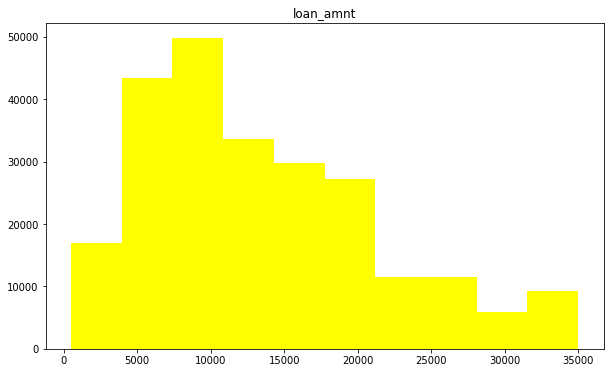

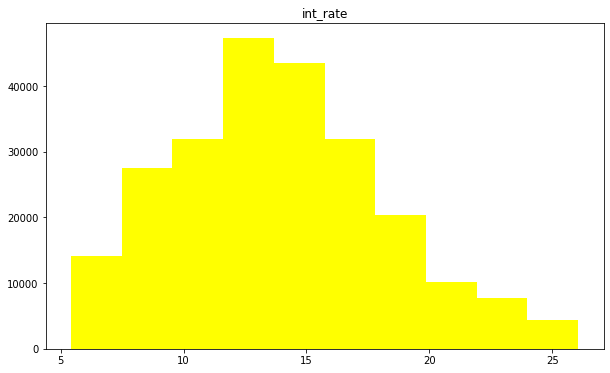

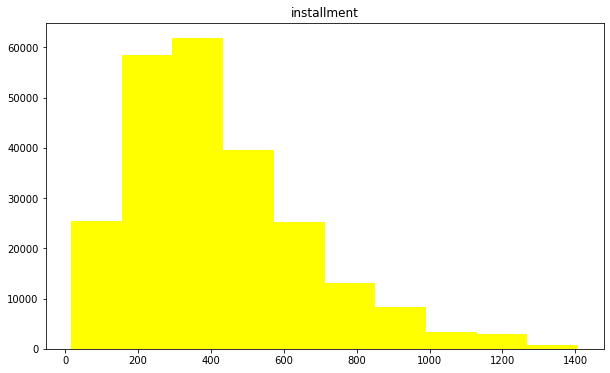

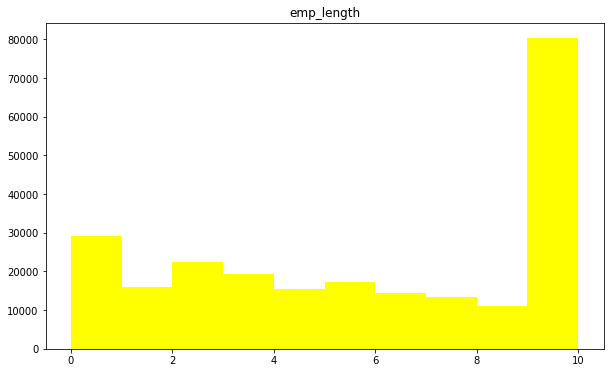

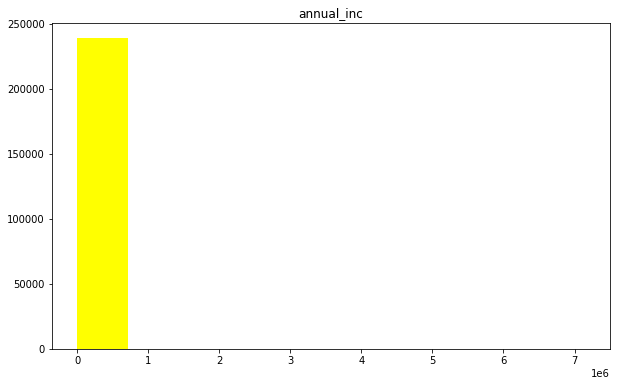

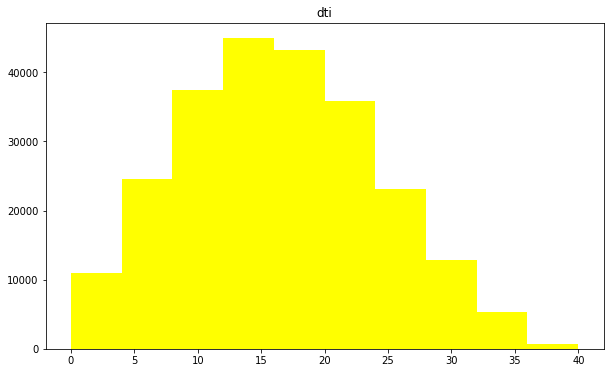

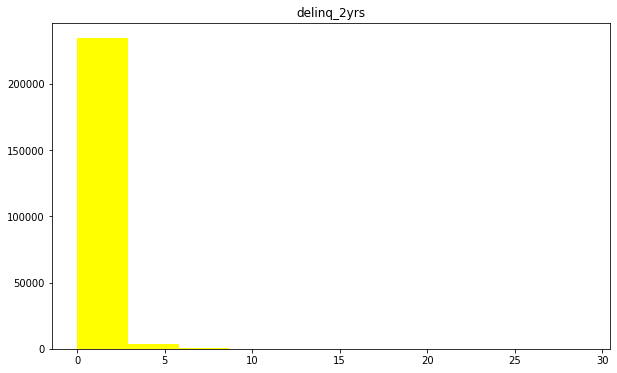

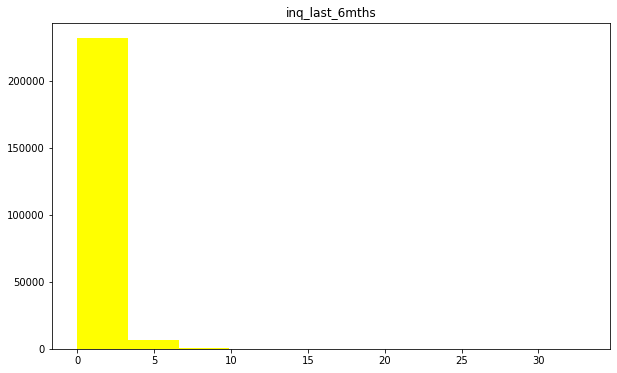

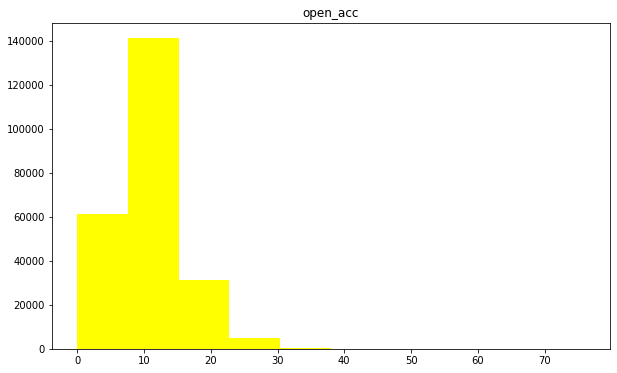

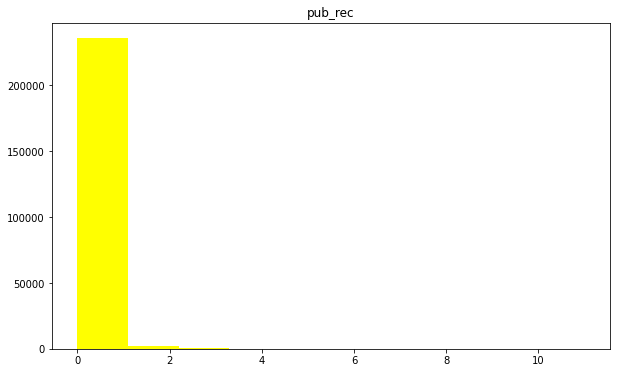

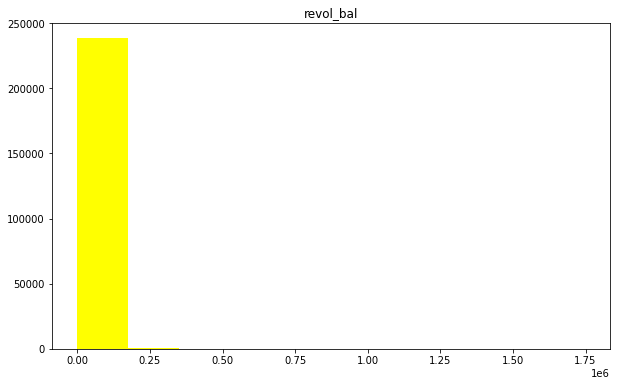

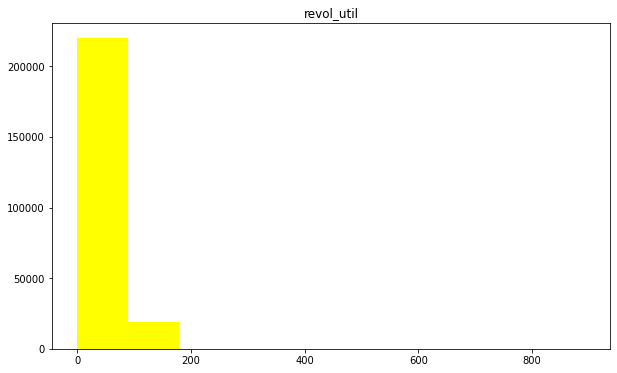

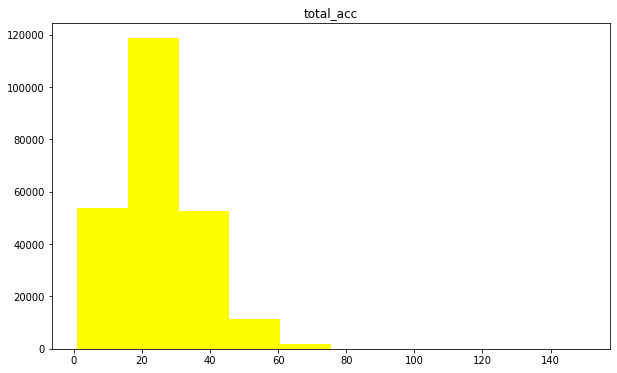

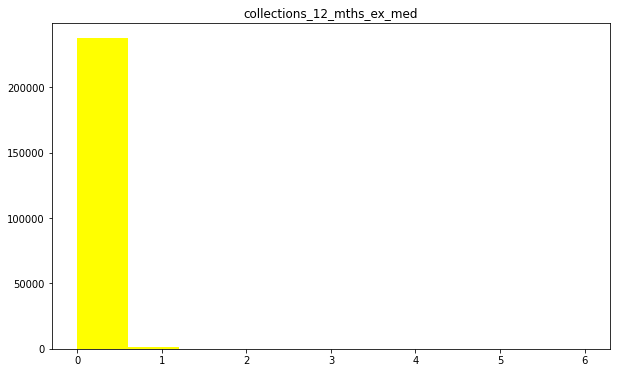

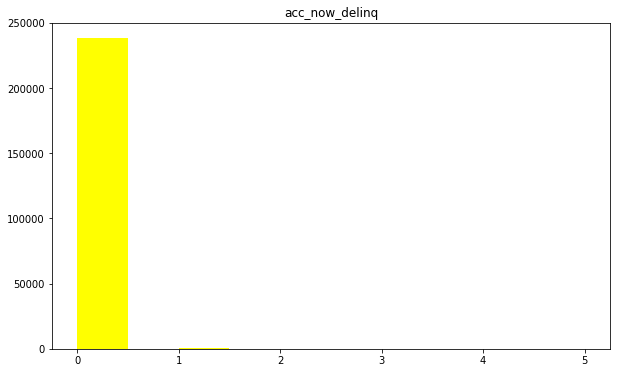

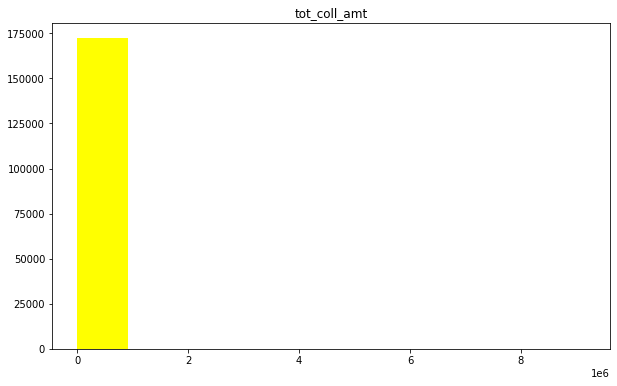

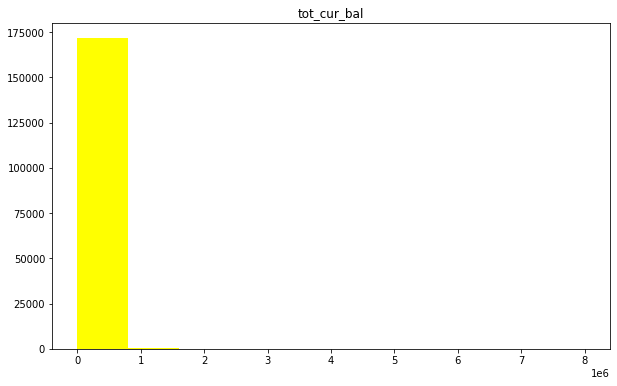

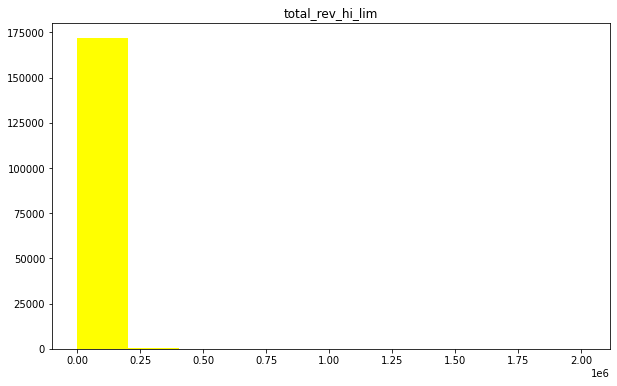

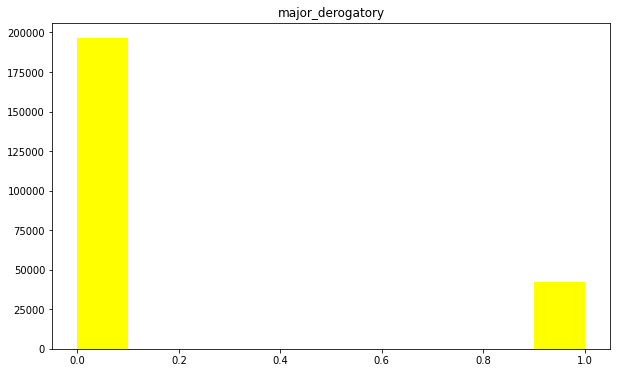

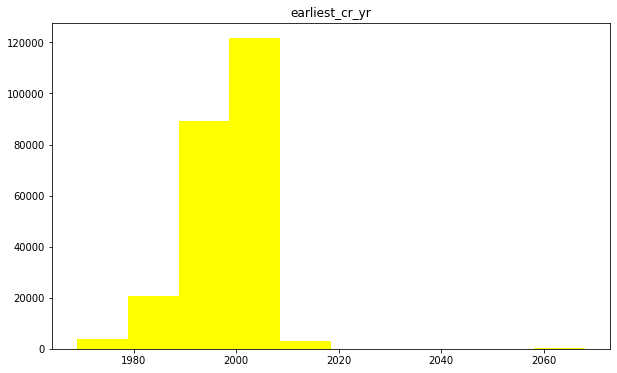

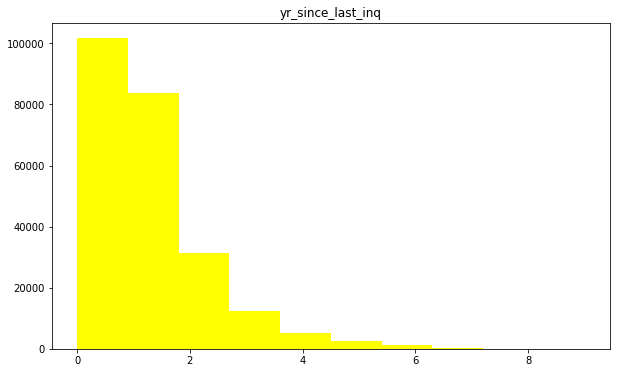

In [42]:
for i in numeric_data.columns:
    plt.figure(figsize=(10,6))
    plt.hist(numeric_data[i], color = 'yellow')
    plt.title(i)
    plt.show()

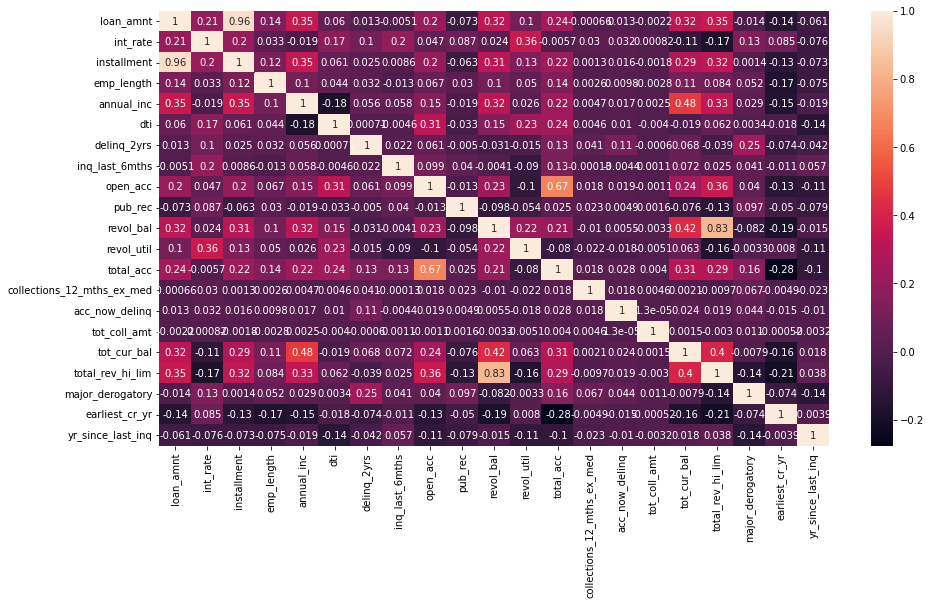

In [43]:
plt.figure(figsize=(15 ,8))
sns.heatmap(data=numeric_data.corr(), annot=True)

In [44]:
categorical_data.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              129889
home_ownership              6
verification_status         3
purpose                    14
title                   49930
zip_code                  875
addr_state                 50
initial_list_status         2
loan_ending                 2
dtype: int64

Penulis menemukan bahwa pada kolom data 'emp_title', 'title', dan kolom 'zip_code' memiliki *unique* values yang terlalu banyak. Sehingga penulis memutuskan untuk melakukan drop terhadap 3 kolom data tersebut.

In [45]:
dropped_categorical_data = ['zip_code', 'title', 'emp_title']
dropped_data = pd.concat([dropped_data, data[dropped_categorical_data]], axis = 1)

categorical_data.drop(dropped_categorical_data, axis=1, inplace=True)
categorical_data.columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'purpose', 'addr_state', 'initial_list_status', 'loan_ending'],
      dtype='object')

In [46]:
dropped_data = pd.concat([dropped_data, data['sub_grade']], axis = 1)
categorical_data.drop('sub_grade', axis = 1, inplace=True)
categorical_data.nunique()

term                    2
grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64

### DATA PREPROCESSING

#### Ordinal Encoder

In [47]:
categorical_data['term'] = categorical_data['term'].str.replace(' months', '').astype(int)

In [48]:
categorical_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [49]:
# Melakukan transformasi terhadap kolom data 'grade'

grade_map = {
    'A' : 1,
    'B' : 2,
    'C' : 3,
    'D' : 4,
    'E' : 5,
    'F' : 6,
    'G' : 7,
}
categorical_data['grade'] = categorical_data['grade'].map(grade_map)

#### One Hot Encoding

In [50]:
# Source learning: https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db
dummies_data = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummies = pd.get_dummies(categorical_data[dummies_data])
dummies.drop('initial_list_status_w', axis=1, inplace=True)

dummies.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
dropped_data = pd.concat([dropped_data, categorical_data[dummies_data]], axis = 1)
categorical_data.drop(dummies_data, axis=1, inplace=True)

In [52]:
categorical_data_fused = pd.concat([categorical_data, dummies], axis = 1)

In [53]:
final_data = pd.concat([numeric_data, categorical_data_fused], axis = 1).dropna().reset_index().drop('index', axis = 1)
final_data.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,12000,13.53,407.40,10,40000.0,16.94,0.0,0.0,7.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,3000,12.85,100.87,10,25000.0,24.68,0.0,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,1
2,28000,7.62,872.52,5,325000.0,18.55,0.0,1.0,15.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,24000,13.53,814.80,10,100000.0,22.18,0.0,0.0,14.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,8000,10.99,261.88,2,33000.0,15.75,0.0,1.0,9.0,1.0,...,0,0,0,0,0,0,0,0,0,1


Salah satu kekurangan dalam menggunakan OneHotEncoding ialah menambah jumlah kolom data secara signifikan, apabila sebuah kolom memiliki nilai unik yang beragam.

In [54]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172159 entries, 0 to 172158
Data columns (total 98 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            172159 non-null  int64  
 1   int_rate                             172159 non-null  float64
 2   installment                          172159 non-null  float64
 3   emp_length                           172159 non-null  int64  
 4   annual_inc                           172159 non-null  float64
 5   dti                                  172159 non-null  float64
 6   delinq_2yrs                          172159 non-null  float64
 7   inq_last_6mths                       172159 non-null  float64
 8   open_acc                             172159 non-null  float64
 9   pub_rec                              172159 non-null  float64
 10  revol_bal                            172159 non-null  int64  
 11  revol_util   

### SPLITTING DATASET INTO TRAINING AND TEST SET

In [55]:
X = final_data.drop('loan_ending', axis = 1) # Variabel X mengambil semua fitur, kecuali kolom 'loan_ending', karena kolom tsb menjadi target
y = final_data['loan_ending'] # Variabel y merupakan variabel dependen dan berisi data target 'loan_ending'

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [57]:
appended_y_train = np.where(y_train == 'good', 1, 0)
appended_y_test = np.where(y_test == 'good', 1, 0)

### MACHINE LEARNING MODEL

In [58]:
# Penulis ingin melakukan pengujian performa untuk berbagai algoritma, sehingga dipilih yang memiliki performa terbaik nantinya
# List model yang akan diuji oleh penulis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.svm import SVC

# Metode evaluasi terhadap model yang diuji
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [59]:
# Algoritma Decision Tree
DT = tree.DecisionTreeClassifier(random_state = 14)
DT.fit(X_train, appended_y_train)
pred_y = DT.predict(X_test)
print(classification_report(appended_y_test, pred_y))

              precision    recall  f1-score   support

           0       0.35      0.35      0.35      8361
           1       0.79      0.79      0.79     26071

    accuracy                           0.68     34432
   macro avg       0.57      0.57      0.57     34432
weighted avg       0.68      0.68      0.68     34432



In [60]:
# Algoritma KNN
KNN = KNeighborsClassifier()
KNN.fit(X_train, appended_y_train)
pred_y = KNN.predict(X_test)
print(classification_report(appended_y_test, pred_y))

              precision    recall  f1-score   support

           0       0.33      0.15      0.21      8361
           1       0.77      0.90      0.83     26071

    accuracy                           0.72     34432
   macro avg       0.55      0.53      0.52     34432
weighted avg       0.66      0.72      0.68     34432



In [61]:
# Algoritma Random Forest
RF = RandomForestClassifier(random_state = 14)
RF.fit(X_train, appended_y_train)
pred_y = RF.predict(X_test)
print(classification_report(appended_y_test, pred_y))

              precision    recall  f1-score   support

           0       0.63      0.14      0.22      8361
           1       0.78      0.97      0.87     26071

    accuracy                           0.77     34432
   macro avg       0.70      0.55      0.54     34432
weighted avg       0.74      0.77      0.71     34432



In [62]:
# Algoritma XGBoost
XGB = XGBClassifier(random_state = 14)
XGB.fit(X_train, appended_y_train)
pred_y = XGB.predict(X_test)
print(classification_report(appended_y_test, pred_y))

              precision    recall  f1-score   support

           0       0.62      0.12      0.20      8361
           1       0.78      0.98      0.86     26071

    accuracy                           0.77     34432
   macro avg       0.70      0.55      0.53     34432
weighted avg       0.74      0.77      0.70     34432



In [65]:
# Algoritma Voting Classifier
CLF = VotingClassifier(estimators = [('KNN', KNN),('RF', RF),('XGB', XGB)], voting = 'soft')
CLF.fit(X_train, appended_y_train)
pred_y = CLF.predict(X_test)
print(classification_report(appended_y_test, pred_y))

              precision    recall  f1-score   support

           0       0.61      0.08      0.15      8361
           1       0.77      0.98      0.86     26071

    accuracy                           0.76     34432
   macro avg       0.69      0.53      0.51     34432
weighted avg       0.73      0.76      0.69     34432

